In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.optimize import minimize

In [98]:
def extract_evt(filename):
    infile = open(filename, 'r')
    x = []
    y = []
    for line in infile:
        words = line.split()
        x.append(round(float(words[0]))-1)
        y.append(round(float(words[1]))-1)        
    infile.close()
    return x,y

In [99]:
def extract_seg(filename):
    infile = open(filename, 'r')
    x = []
    y = []
    for line in infile:
        words = line.split()
        x.append(float(words[0]))
        y.append(float(words[1]))
    infile.close()
    return x,y

In [100]:
filename_sub = 'evt_vec.txt'    
x, y = extract_evt(filename_sub)

In [101]:
filename_sub = 'P.txt'    
P1_seg,P2_seg = extract_seg(filename_sub)

In [106]:
seg1 = np.zeros((260,346))
for i in range (len(x)):
    seg1[y[i],x[i]] = P1_seg[i]
seg2 = np.zeros((260,346))
for i in range (len(x)):
    seg2[y[i],x[i]] = P2_seg[i]

In [107]:
F_seg = seg1
B_seg = seg2
F_seg[F_seg<0.5]=0
B_seg[B_seg<0.5]=0

In [111]:
F_seg = seg1
B_seg = seg2
F_seg[F_seg<1]=0
B_seg[B_seg<1]=0

In [110]:
F_seg.shape

(260, 346)

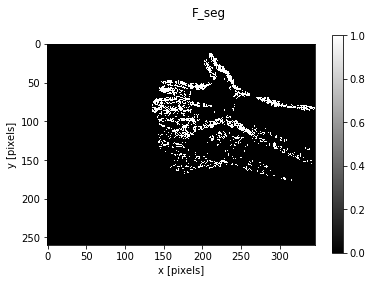

In [115]:
fig = plt.figure()
fig.suptitle('F_seg')

plt.imshow(F_seg, cmap='gray', clim=(0,1))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

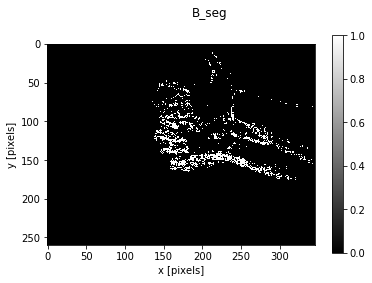

In [113]:
fig = plt.figure()
fig.suptitle('B_seg')

plt.imshow(B_seg, cmap='gray', clim=(0,1))
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")
plt.colorbar()
plt.show()

In [6]:
alpha0 = np.ones([41,41],dtype=np.float32)
beta0 = np.ones([41,41],dtype=np.float32)
Fo0 = 5*np.ones([82,41],dtype=np.float32)
Bo0 = 5*np.ones([82,41],dtype=np.float32)
x0 = np.vstack((alpha0,beta0,Fo0,Bo0))
print(x0.shape)
#x0 = x0.flatten()
print(x0.shape)

(246, 41)
(246, 41)


In [10]:
Cx = u1
Cy = v1
Fx = Fu
Fy = Fv
Bx = Bu
By = Bv

In [11]:
#input: Cx,Cy,Fx,Fy,Bx,By
#output: alpha, beta, f1, f2, b1, b2
h,w = Cx.shape
l = h * w

C = np.vstack((Cx,Cy))
F = np.vstack((Fx,Fy))
B = np.vstack((Bx,By))
e = 1e-10 # value that close to 0

#C - alpha0 * Fo0 - beta0 * Bo0
#fun = lambda x: np.sum((C.reshape([2*h,w]) - x.reshape([6,2])[0,:] * x.reshape([6,2])[2:4,:] - x.reshape([6,2])[1,:]\
                       # * x.reshape([6,2])[4:6,:]) **2)   
    
#cons = ({'type': 'ineq', 'fun': lambda x: x[0:4] - e },\
        #{'type': 'ineq', 'fun': lambda x: -x[0:4] + 1},\
        #{'type': 'eq', 'fun': lambda x: F - np.append(x[0:2],x[0:2]) * x[4:8]},\
        #{'type': 'eq', 'fun': lambda x: B - np.append(x[2:4],x[2:4]) * x[8:12]})

alpha = []
beta = []
f1 = []
f2 = []
b1 = []
b2 = []

for i in range (h):
    print(i)
    x0 = np.ones([6,w])
    cc = np.append(C[i,:],C[i+h,:])
    ff = np.append(F[i,:],F[i+h,:])
    bb = np.append(B[i,:],B[i+h,:])
    
    fun = lambda x: np.sum((cc.reshape([2,w]) - np.vstack((x.reshape([6,w])[0,:],x.reshape([6,w])[0,:])) * \
                            x.reshape([6,w])[2:4,:] - np.vstack((x.reshape([6,w])[1,:],x.reshape([6,w])[1,:]))\
                            * x.reshape([6,w])[4:6,:]) **2)
    
    cons = ({'type': 'ineq', 'fun': lambda x: x[0:2*w] - e },\
            {'type': 'ineq', 'fun': lambda x: -x[0:2*w] + 1},\
            {'type': 'eq', 'fun': lambda x: ff - np.append(x[0:w],x[0:w]) * x[2*w:4*w]},\
            {'type': 'eq', 'fun': lambda x: bb - np.append(x[w:2*w],x[w:2*w]) * x[4*w:6*w]})
    
    res = minimize(fun, x0, method='SLSQP',constraints=cons)
    
    r = res.x
    alpha = np.append(alpha,r.reshape([6,w])[0,:])
    beta = np.append(beta,r.reshape([6,w])[1,:])
    f1 = np.append(f1,r.reshape([6,w])[2,:])
    f2 = np.append(f2,r.reshape([6,w])[3,:])
    b1 = np.append(b1,r.reshape([6,w])[4,:])
    b2 = np.append(b2,r.reshape([6,w])[5,:])

alpha = alpha.reshape([h,w])
beta = beta.reshape([h,w])
f1 = f1.reshape([h,w])
f2 = f2.reshape([h,w])
b1 = b1.reshape([h,w])
b2 = b2.reshape([h,w])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
